In [1]:
# Simulation Design

library(hdm)

set.seed(1)
B= 1000 # trials
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=100
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X = matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y =  D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=F)$res
resD = rlasso(D~ X, Post=F)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}


In [52]:
hist$freq

ERROR: Error in hist$freq: object of type 'closure' is not subsettable


In [55]:
B$breaks

[1] -0.6 -0.4 -0.2  0.0  0.2  0.4  0.6  0.8  1.0  1.2

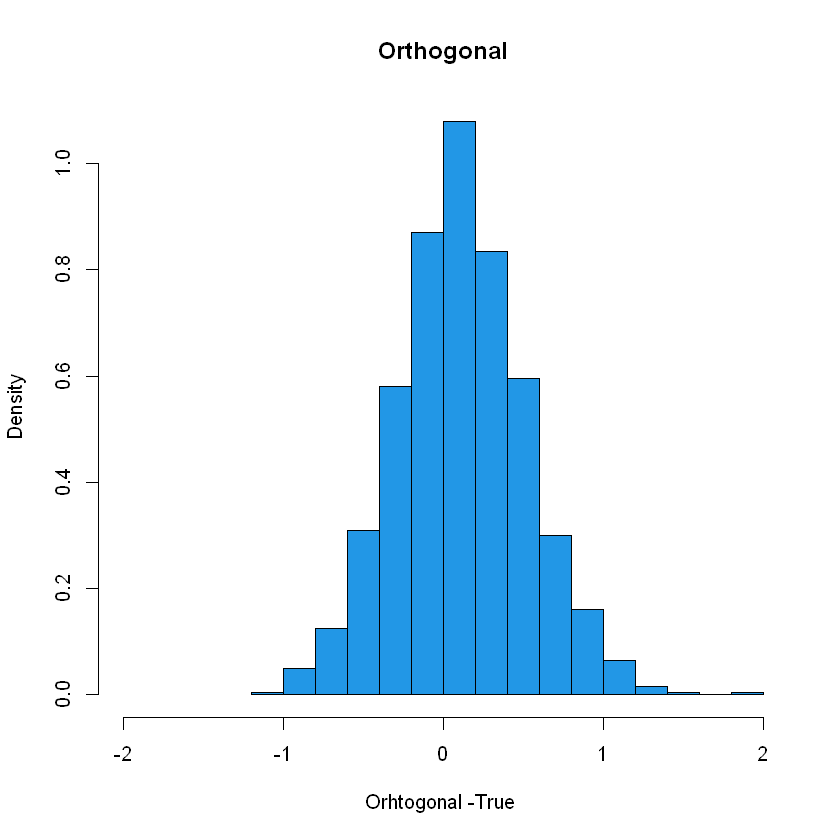

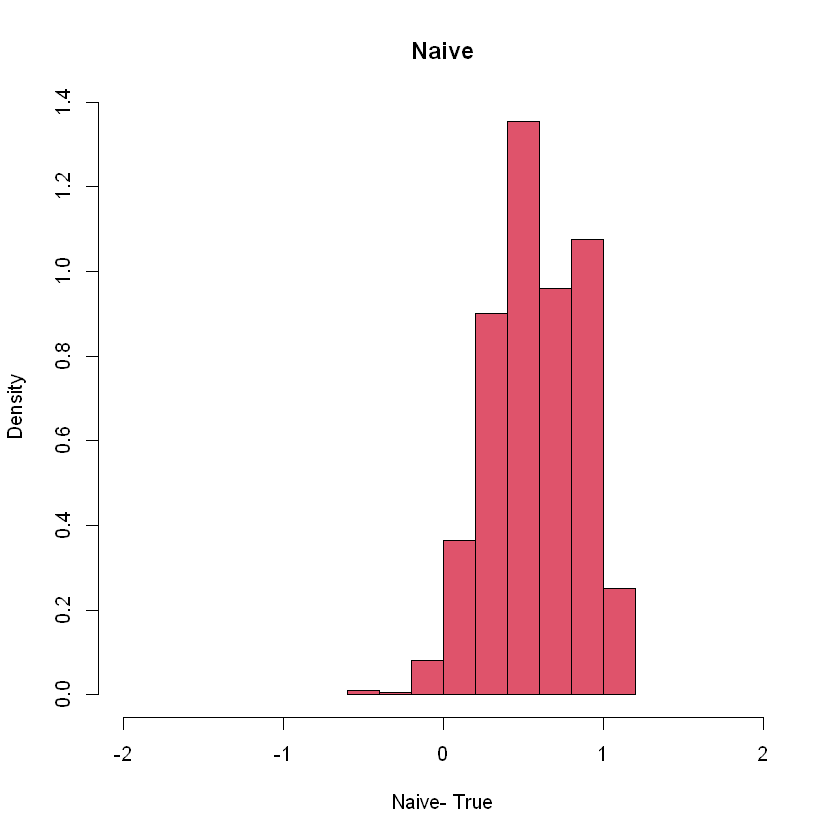

In [53]:
A = hist(Orthogonal-1,col=4, freq=F, xlim= c(-2, 2), xlab= "Orhtogonal -True ", main="Orthogonal")
B = hist(Naive-1, col=2, freq=F, xlim= c(-2,2), xlab= "Naive- True", main = "Naive")


In [3]:
library(hdm)

set.seed(1)
B= 1000 # trials 
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=100
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y =  D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=T)$res
resD = rlasso(D~ X, Post=T)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}


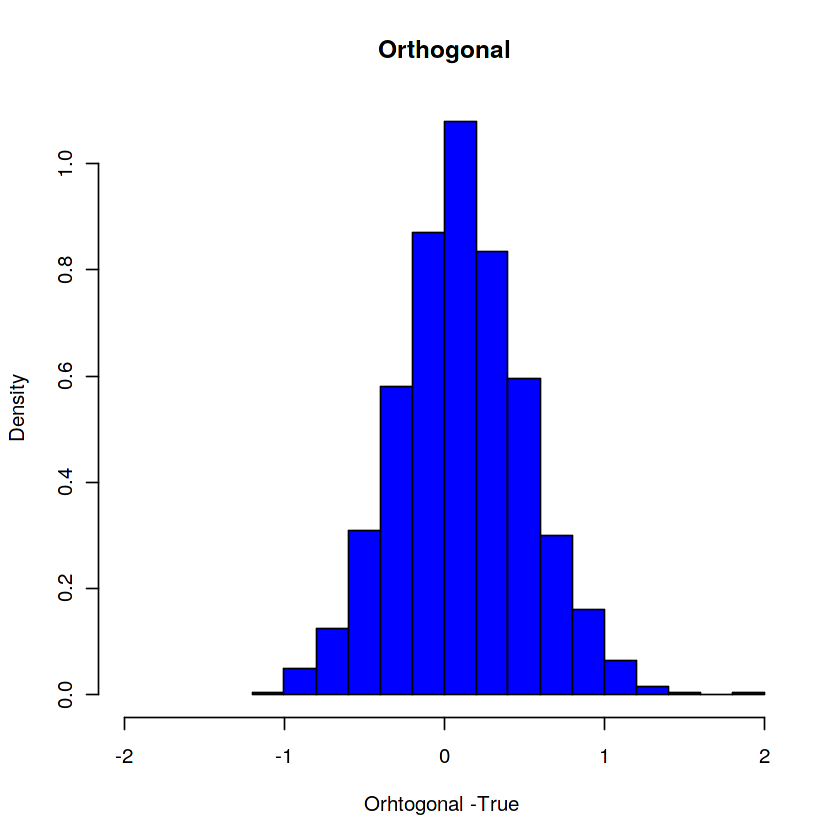

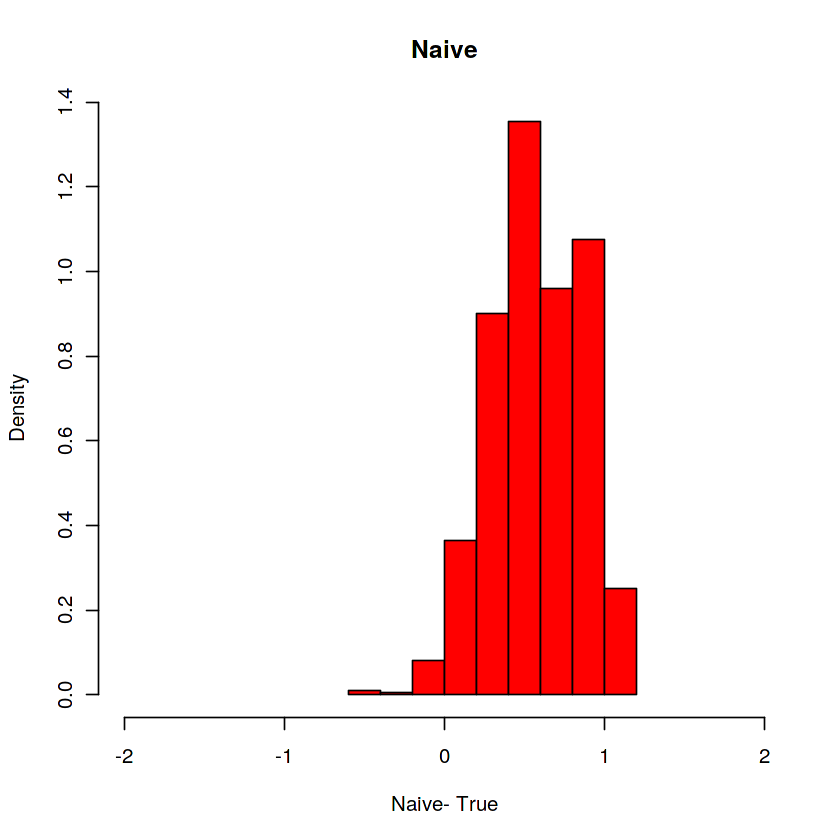

In [4]:
hist(Orthogonal-1,col=4, freq=F, xlim= c(-2, 2), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-1, col=2, freq=F, xlim= c(-2,2), xlab= "Naive- True", main = "Naive")
